Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

# Predict Delivery time using sort time

In [112]:
# import libraries
import pandas as pd
import numpy as np

In [113]:
df_del = pd.read_csv('delivery_time.csv')
df_del.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Features Data Analysis (EDA)

In [114]:
df_del.shape

(21, 2)

In [115]:
# Check whether both columns are numerical or not.
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [116]:
## Mean, Median and Mode are 6.19, 6 and 7 respectively. Looks like normal distributed data.
print('Median of Sorting time column: ', df_del['Sorting Time'].median())
print('Mode of Sorting time column: ', df_del['Sorting Time'].mode())
print(df_del.describe())


Median of Sorting time column:  6.0
Mode of Sorting time column:  0    7
dtype: int64
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


In [117]:
# Check for null values
df_del.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

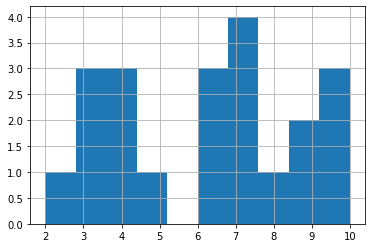

In [118]:
## Outlier Detection
df_del['Sorting Time'].hist()

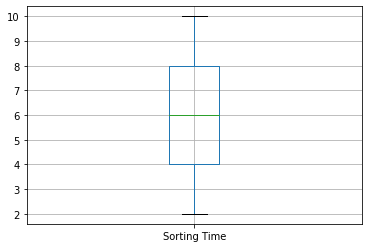

In [119]:
# Box plot indicates no outliers exists in feature column
df_del.boxplot(column='Sorting Time')

## Simple Linear Regression for Delivery Time prediction

In [120]:
import statsmodels.formula.api as smf
import seaborn as sns

In [121]:
# Rename column names by removing space in them
df_del.rename(columns={'Delivery Time': 'Delivery_Time'}, inplace=True)
df_del.rename(columns={'Sorting Time': 'Sorting_Time'}, inplace=True)
df_del

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [122]:
model_del = smf.ols('Delivery_Time ~ Sorting_Time', data = df_del).fit()

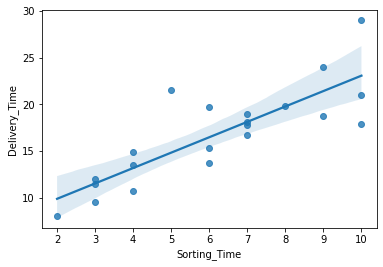

In [123]:
sns.regplot(x='Sorting_Time', y='Delivery_Time', data = df_del)

In [124]:
# Delivery Time = 1.649020 * Sorting Time + 6.582734 
model_del.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [125]:
# P value of Sorting Time column is almost 0 which is less than 0.05 and R2 is greater than 0.5. Indicates good model.
model_del.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        11:02:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction for new data

In [126]:
# Predict for sorting time 11 and 12 values
newdata = pd.Series([11,12])

In [127]:
df_newdata = pd.DataFrame(data=newdata, columns=['Sorting_Time'])
df_newdata

,Sorting_Time
0,11
1,12


In [128]:
model_del.predict(df_newdata)

0    24.721953
1    26.370973
dtype: float64

# Predict Salary based on Years of experience

In [129]:
df_sal = pd.read_csv('Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Features Data Analysis (EDA) for Salary Data

In [130]:
# No null values exists
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [131]:
# Normalization or Standardization
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler_df_sal = pd.DataFrame(scaler.fit_transform(df_sal))
#scaler_df_sal.columns = ['YearsExperience', 'Salary']
#scaler_df_sal


In [132]:
## Model creation for Salary Data

In [133]:
import statsmodels.formula.api as smf
model_sal = smf.ols('Salary~YearsExperience', data = df_sal).fit()

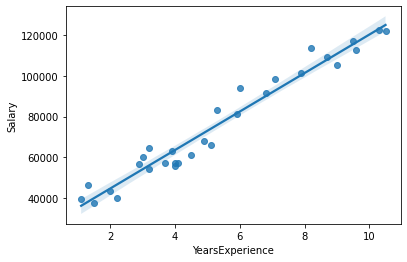

In [134]:
import seaborn as sns
sns.regplot(x='YearsExperience', y='Salary', data = df_sal)

In [135]:
model_sal.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [136]:
# Model is good due to zero p-value for input feature and good R-Squared and Adj. R-Squared values
model_sal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        11:02:21   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediction for new data 11 and 12 years 

In [137]:
newdata_sal = pd.Series([11,12])
df_newdata_sal = pd.DataFrame(newdata_sal, columns=['YearsExperience'])
df_newdata_sal

,YearsExperience
0,11
1,12


In [138]:
model_sal.predict(df_newdata_sal)

0    129741.785735
1    139191.748056
dtype: float64